In [63]:
from sympy import *
from IPython.display import display
from random import randint

init_printing()

eqs = []

# this constant shows a "xy-point to a scalar" mapping.
points = [[[randint(1,14)*sqrt(5), randint(1,14)*sqrt(5)], randint(1,14)] for _ in range(4)]

coeff_to_component = {}

k = 3

def ij_to_coeff(i, j):
    return Symbol('\\beta_{x^%sy^%s}' % (i, j))

# construct a "symbol to sympy formula" mapping
for i in range(k):
    for j in range(k):
        coeff = ij_to_coeff(i, j)
        coeff_to_component[coeff] = (Symbol('x')**i)*(Symbol('y')**j)

# construct equations for polynomial fitting
for [[x,y],z] in points:
    sumval = -z
    for i in range(k):
        for j in range(k):
            coeff = ij_to_coeff(i, j)
            sumval += (x**i)*(y**j)*coeff
    eqs.append(sumval)

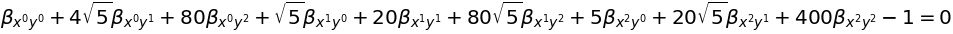

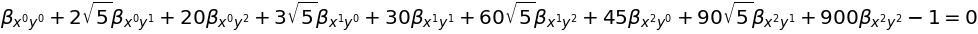

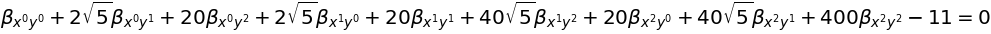

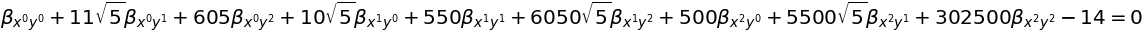

In [70]:
# print equations
for eq in eqs:
    display(Eq(eq, 0))

In [65]:
# solve equations
solution = solve(eqs)

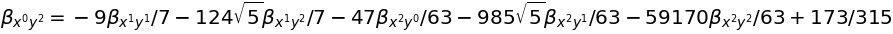

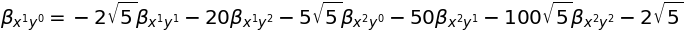

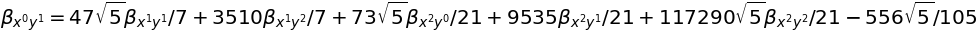

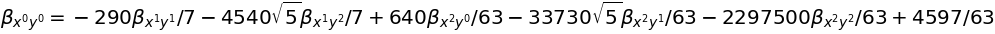

In [66]:
# print solution

for name, value in solution.items():
    display(Eq(name, value))

In [67]:
# calculate "x^iy^j -> coefficient" mapping

sol_coeffs = {}
for name, value in solution.items():
    sol_coeffs[name] = value.subs(zip(coeff_to_component.keys(),[0]*len(coeff_to_component)))

In [68]:
# calculate polynomial from "x^iy^j -> coefficient " mapping
sol_polynomial = 0
for name, value in sol_coeffs.items():
    sol_polynomial += coeff_to_component[name]*value

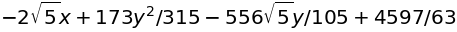

In [69]:
# print calculated polynomial
display(sol_polynomial)